In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv('/content/drive/MyDrive/ExcelRDataset/Fraud_check.csv')
df.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
df.columns


Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [42]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [43]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [44]:
is_dup = df[df.duplicated()]
len(is_dup)

0

In [45]:
df.shape

(600, 6)

In [46]:
df.nunique().sort_values(ascending=False)

Taxable.Income     599
City.Population    598
Work.Experience     31
Marital.Status       3
Undergrad            2
Urban                2
dtype: int64

<Axes: >

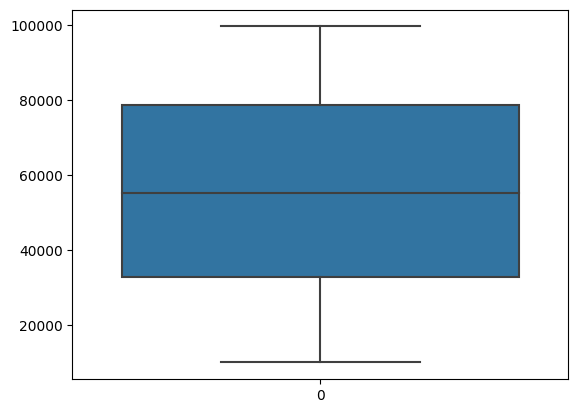

In [47]:
sns.boxplot(df['Taxable.Income'])

In [48]:
# corelation
df.corr()

<ipython-input-48-8c2af235ac03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: xlabel='fraud_status', ylabel='count'>

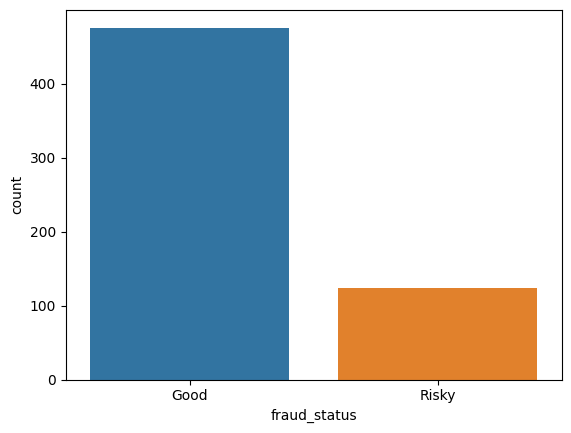

In [49]:
df['fraud_status'] = ['Risky' if item <=30000 else 'Good' for item in df['Taxable.Income']]
# df['fraud_status'].value_counts()
sns.countplot(x=df['fraud_status'])

In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
lb = LabelEncoder()

col = ['Marital.Status','Undergrad','Urban','fraud_status',]
df[col] = df[col].apply(lb.fit_transform)
df


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [51]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,0.004830
fraud_status,0.012523,0.006081,-0.688725,0.012225,-0.001972,0.004830,1.000000


In [52]:
df.head(5)
df['fraud_status'].value_counts()


0    476
1    124
Name: fraud_status, dtype: int64

In [53]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [54]:
X = df.iloc[:,[1,0,3,4,5]].values
y = df.iloc[:,-1].values

X.shape,y.shape


((600, 5), (600,))

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 476, 1: 124})
Resample dataset shape Counter({0: 476, 1: 476})


<Axes: ylabel='count'>

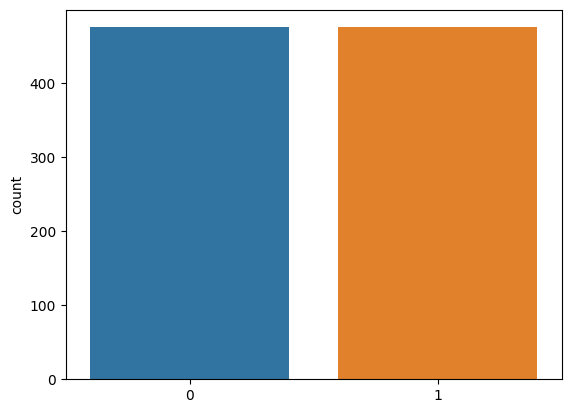

In [56]:
sns.countplot(x=y_smote)

In [57]:

ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x_smote = np.array(ct.fit_transform(x_smote))

In [58]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(x_smote)
# X = X[:,1:]
X

array([[-0.70154331, -0.80972352,  1.62711695, ..., -1.18806797,
        -0.69977645,  1.17981346],
       [ 1.42542875, -0.80972352, -0.61458397, ...,  0.50298161,
         0.277575  ,  1.17981346],
       [-0.70154331,  1.23498945, -0.61458397, ...,  1.02884353,
         1.74360216,  1.17981346],
       ...,
       [-0.70154331, -0.80972352,  1.62711695, ..., -0.41680382,
         0.15540607,  1.17981346],
       [-0.70154331,  1.23498945, -0.61458397, ...,  1.58298084,
        -1.18845217, -0.84759162],
       [-0.70154331,  1.23498945, -0.61458397, ..., -1.14554419,
         0.88841965, -0.84759162]])

In [59]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=123)
kfold = KFold(n_splits=15,shuffle=True,random_state=123)




In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=10,ccp_alpha=0.0,random_state=123)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=123)

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grids = {
    'criterion':['gini','entropy'],
    'max_depth':[10,11,12,13,14,15,16,17,18,19,20],
    'ccp_alpha':[0.        , 0.00133929, 0.00255682, 0.00273437, 0.00277778,
        0.00408381, 0.00416667, 0.00416667, 0.00416667, 0.00421875,
        0.0046875 , 0.0046875 , 0.0046875 , 0.0046875 , 0.0046875 ,
        0.0047619 , 0.00486111, 0.005     , 0.00510417, 0.00520833,
        0.00535714, 0.00536526, 0.00546875, 0.00555556, 0.00597826,
        0.00602679, 0.00625   , 0.0065625 , 0.0069375 , 0.00698116,
        0.00703125, 0.00714486, 0.00729167, 0.00744048, 0.0074537 ,
        0.0074547 , 0.00748029, 0.00763889, 0.00773159, 0.00779221,
        0.00810674, 0.00862704, 0.0088426 , 0.00944291, 0.01069275,
        0.01643493, 0.01744497, 0.0257634 , 0.02815098]
}

# classifier = DecisionTreeClassifier(random_state=123,criterion='gini',max_depth=10,ccp_alpha=0.02)

cv = GridSearchCV(DecisionTreeClassifier(random_state=123),param_grid=param_grids,cv=20,scoring='accuracy',n_jobs=-1)
cv.fit(X_train,y_train)
print(cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 19}


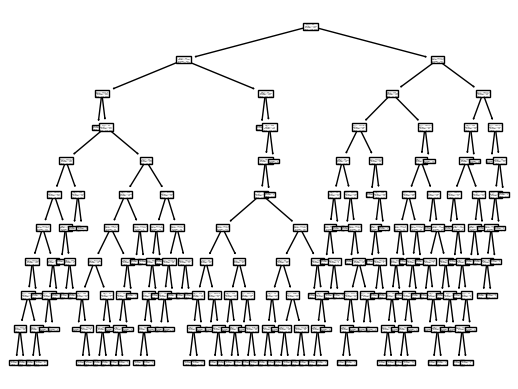

In [119]:
from sklearn.tree import plot_tree

plot_tree(classifier);

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
acc = cross_val_score(classifier,x_smote,y_smote,cv=kfold)
print(np.mean(acc))

0.6584160052910052


In [121]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=123)

In [122]:
classifier.score(X_train,y_train)

0.8515111695137977

In [123]:
classifier.score(X_test,y_test)


0.7015706806282722

In [124]:
y_pred = classifier.predict(X_test)



In [125]:
y_pred_train  = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [67]:
# result = ['True' if y_test.values == y_pred,values 'False']

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.7015706806282722

In [127]:
confusion_matrix(y_test,y_pred)

array([[63, 44],
       [13, 71]])

<Axes: >

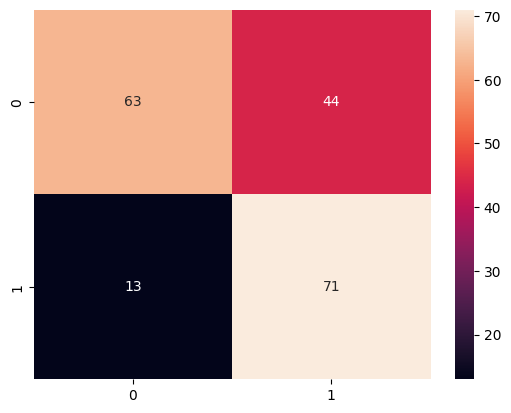

In [128]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69       107
           1       0.62      0.85      0.71        84

    accuracy                           0.70       191
   macro avg       0.72      0.72      0.70       191
weighted avg       0.74      0.70      0.70       191



0.21860410830999066
0.7329598506069093


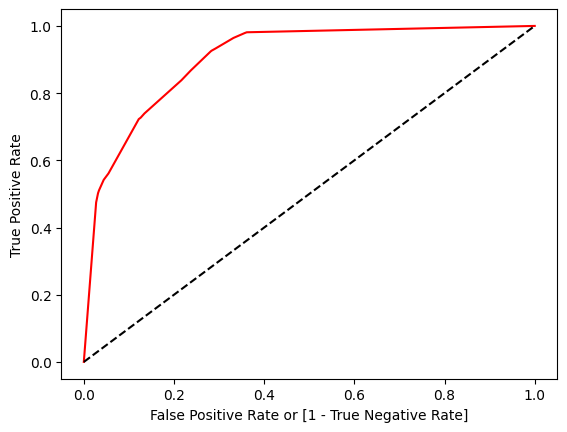

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_smote, classifier.predict_proba(x_smote)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print(fpr.mean())
print(tpr.mean())